In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,RobustScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier , VotingClassifier
from sklearn.model_selection import GridSearchCV ,cross_validate ,RandomizedSearchCV ,validation_curve ,train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , roc_auc_score , confusion_matrix , classification_report , plot_roc_curve
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [2]:
data1 = pd.read_csv("C:/Users/can/Desktop/scoutium_attributes.csv",sep=";")
data2 = pd.read_csv("C:/Users/can/Desktop/scoutium_potential_labels.csv",sep=";")
df = data1.merge(data2,on = ("task_response_id", 'match_id', 'evaluator_id', "player_id"))

In [3]:
data1.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value
0,4915,62935,177676,1361061,2,12818495,4322,56.0
1,4915,62935,177676,1361061,2,12818495,4323,56.0
2,4915,62935,177676,1361061,2,12818495,4324,67.0
3,4915,62935,177676,1361061,2,12818495,4325,56.0
4,4915,62935,177676,1361061,2,12818495,4326,45.0


In [4]:
data2.head()

,task_response_id,match_id,evaluator_id,player_id,potential_label
0,4915,62935,177676,1361061,average
1,4915,62935,177676,1361626,highlighted
2,4915,62935,177676,1361858,average
3,4915,62935,177676,1362220,highlighted
4,4915,62935,177676,1364951,highlighted


In [5]:
df.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.0,average
1,4915,62935,177676,1361061,2,12818495,4323,56.0,average
2,4915,62935,177676,1361061,2,12818495,4324,67.0,average
3,4915,62935,177676,1361061,2,12818495,4325,56.0,average
4,4915,62935,177676,1361061,2,12818495,4326,45.0,average


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 10729
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   task_response_id  10730 non-null  int64  
 1   match_id          10730 non-null  int64  
 2   evaluator_id      10730 non-null  int64  
 3   player_id         10730 non-null  int64  
 4   position_id       10730 non-null  int64  
 5   analysis_id       10730 non-null  int64  
 6   attribute_id      10730 non-null  int64  
 7   attribute_value   10730 non-null  float64
 8   potential_label   10730 non-null  object 
dtypes: float64(1), int64(7), object(1)
memory usage: 838.3+ KB


In [7]:
df.isnull().sum()

task_response_id    0
match_id            0
evaluator_id        0
player_id           0
position_id         0
analysis_id         0
attribute_id        0
attribute_value     0
potential_label     0
dtype: int64

In [8]:
df.tail()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
10725,5642,63032,151191,1909728,7,12825756,4357,67.0,highlighted
10726,5642,63032,151191,1909728,7,12825756,4407,78.0,highlighted
10727,5642,63032,151191,1909728,7,12825756,4408,67.0,highlighted
10728,5642,63032,151191,1909728,7,12825756,4423,67.0,highlighted
10729,5642,63032,151191,1909728,7,12825756,4426,78.0,highlighted


In [9]:
df.describe()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value
count,10730.000000,10730.000000,10730.000000,1.073000e+04,10730.000000,1.073000e+04,10730.000000,10730.000000
mean,5252.082386,63199.764119,175246.879963,1.525548e+06,5.347437,1.282239e+07,4348.608854,55.271109
std,268.254019,663.916588,43667.459325,2.017519e+05,2.861203,2.676866e+03,26.979985,16.048040
min,4915.000000,60549.000000,130478.000000,1.355710e+06,1.000000,1.281848e+07,4322.000000,1.000000
25%,4997.000000,62988.000000,151191.000000,1.367783e+06,3.000000,1.281958e+07,4330.000000,45.000000
50%,5162.000000,63166.000000,151191.000000,1.372670e+06,6.000000,1.282223e+07,4342.000000,56.000000
75%,5524.000000,63627.000000,177676.000000,1.719053e+06,8.000000,1.282505e+07,4353.000000,67.000000
max,5642.000000,64045.000000,256441.000000,1.909728e+06,10.000000,1.282576e+07,4426.000000,100.000000


In [10]:
df.drop(df[df['position_id'] == 1].index, inplace = True)


In [11]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "bool", "object"]]
num_cols = [col for col in df.columns if col not in cat_cols]
cat_cols,num_cols = cat_cols,num_cols


In [12]:
df["potential_label"].value_counts()

average          7922
highlighted      1972
below_average     136
Name: potential_label, dtype: int64

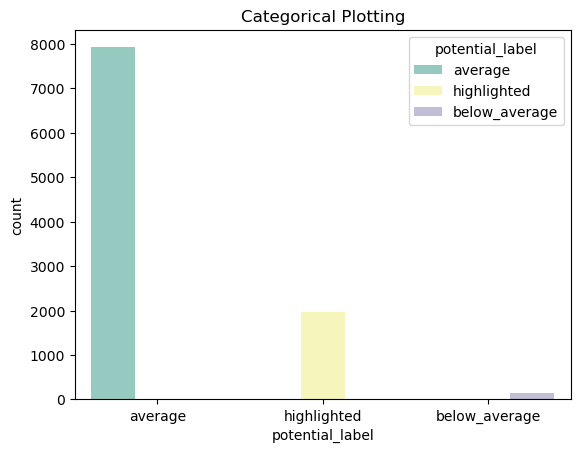

In [13]:
sns.countplot(x="potential_label", hue="potential_label", data=df,palette="Set3")
plt.title('Categorical Plotting')
plt.show()

In [14]:
df.drop(df[df['potential_label'] == "below_average"].index, inplace = True)


In [15]:
atvalue_pivot = pd.pivot_table(data=df,
                        index=['player_id','position_id','potential_label'],
                        columns=['attribute_id'],
                        values='attribute_value')
atvalue_pivot

attribute_id                           4322  4323  4324  4325  4326  4327  \
player_id position_id potential_label                                       
1355710   7           average          50.5  50.5  34.0  50.5  45.0  45.0   
1356362   9           average          67.0  67.0  67.0  67.0  67.0  67.0   
1356375   3           average          67.0  67.0  67.0  67.0  67.0  67.0   
          4           average          67.0  78.0  67.0  67.0  67.0  78.0   
1356411   9           average          67.0  67.0  78.0  78.0  67.0  67.0   
...                                     ...   ...   ...   ...   ...   ...   
1907347   5           average          67.0  78.0  78.0  56.0  78.0  67.0   
          6           average          67.0  67.0  67.0  67.0  67.0  67.0   
1909532   10          average          56.0  45.0  45.0  45.0  56.0  56.0   
1909724   2           highlighted      78.0  78.0  78.0  78.0  78.0  78.0   
1909728   7           highlighted      78.0  67.0  67.0  78.0  67.0  67.0   

attribute_id                           4328  4329  4330  4332  ...  4352  \
player_id position_id potential_label                          ...         
1355710   7           average          45.0  45.0  50.5  56.0  ...  56.0   
1356362   9           average          67.0  67.0  67.0  67.0  ...  67.0   
1356375   3           average          67.0  78.0  67.0  67.0  ...  67.0   
          4           average          78.0  78.0  56.0  67.0  ...  78.0   
1356411   9           average          67.0  67.0  89.0  78.0  ...  67.0   
...                                     ...   ...   ...   ...  ...   ...   
1907347   5           average          78.0  67.0  56.0  78.0  ...  67.0   
          6           average          67.0  78.0  67.0  67.0  ...  67.0   
1909532   10          average          56.0  56.0  23.0  23.0  ...  45.0   
1909724   2           highlighted      78.0  78.0  67.0  67.0  ...  78.0   
1909728   7           highlighted      67.0  78.0  67.0  67.0  ...  67.0   

attribute_id                           4353  4354  4355  4356  4357  4407  \
player_id position_id potential_label                                       
1355710   7           average          34.0  39.5  50.5  34.0  34.0  56.0   
1356362   9           average          67.0  78.0  67.0  67.0  67.0  67.0   
1356375   3           average          67.0  78.0  67.0  67.0  67.0  67.0   
          4           average          67.0  67.0  67.0  56.0  67.0  56.0   
1356411   9           average          56.0  67.0  67.0  56.0  67.0  89.0   
...                                     ...   ...   ...   ...   ...   ...   
1907347   5           average          67.0  67.0  67.0  56.0  67.0  78.0   
          6           average          67.0  78.0  67.0  67.0  67.0  67.0   
1909532   10          average          45.0  56.0  34.0  34.0  56.0  34.0   
1909724   2           highlighted      78.0  78.0  67.0  67.0  67.0  78.0   
1909728   7           highlighted      67.0  78.0  67.0  67.0  67.0  78.0   

attribute_id                           4408  4423  4426  
player_id position_id potential_label                    
1355710   7           average          34.0  34.0  56.0  
1356362   9           average          67.0  56.0  78.0  
1356375   3           average          67.0  56.0  78.0  
          4           average          67.0  45.0  56.0  
1356411   9           average          56.0  67.0  78.0  
...                                     ...   ...   ...  
1907347   5           average          78.0  78.0  56.0  
          6           average          67.0  67.0  78.0  
1909532   10          average          34.0  34.0  23.0  
1909724   2           highlighted      78.0  67.0  78.0  
1909728   7           highlighted      67.0  67.0  78.0  

[271 rows x 34 columns]

In [16]:
atvalue_pivot.reset_index(inplace=True)
atvalue_pivot = atvalue_pivot.astype(str)
atvalue_pivot

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,average,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,average,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,average,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1907347,5,average,67.0,78.0,78.0,56.0,78.0,67.0,78.0,...,67.0,67.0,67.0,67.0,56.0,67.0,78.0,78.0,78.0,56.0
267,1907347,6,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0
268,1909532,10,average,56.0,45.0,45.0,45.0,56.0,56.0,56.0,...,45.0,45.0,56.0,34.0,34.0,56.0,34.0,34.0,34.0,23.0
269,1909724,2,highlighted,78.0,78.0,78.0,78.0,78.0,78.0,78.0,...,78.0,78.0,78.0,67.0,67.0,67.0,78.0,78.0,67.0,78.0


In [17]:
def label_encoder(dataframe,binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [18]:
atvalue_pivot = label_encoder(atvalue_pivot,"potential_label")

In [19]:
atvalue_pivot

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,0,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,0,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1907347,5,0,67.0,78.0,78.0,56.0,78.0,67.0,78.0,...,67.0,67.0,67.0,67.0,56.0,67.0,78.0,78.0,78.0,56.0
267,1907347,6,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0
268,1909532,10,0,56.0,45.0,45.0,45.0,56.0,56.0,56.0,...,45.0,45.0,56.0,34.0,34.0,56.0,34.0,34.0,34.0,23.0
269,1909724,2,1,78.0,78.0,78.0,78.0,78.0,78.0,78.0,...,78.0,78.0,78.0,67.0,67.0,67.0,78.0,78.0,67.0,78.0


In [20]:
atvalue_pivot.columns = atvalue_pivot.columns.astype(str)
atvalue_pivot

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,0,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,0,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1907347,5,0,67.0,78.0,78.0,56.0,78.0,67.0,78.0,...,67.0,67.0,67.0,67.0,56.0,67.0,78.0,78.0,78.0,56.0
267,1907347,6,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0
268,1909532,10,0,56.0,45.0,45.0,45.0,56.0,56.0,56.0,...,45.0,45.0,56.0,34.0,34.0,56.0,34.0,34.0,34.0,23.0
269,1909724,2,1,78.0,78.0,78.0,78.0,78.0,78.0,78.0,...,78.0,78.0,78.0,67.0,67.0,67.0,78.0,78.0,67.0,78.0


In [21]:
num_cols = atvalue_pivot.columns[3:]
num_cols

Index(['4322', '4323', '4324', '4325', '4326', '4327', '4328', '4329', '4330',
       '4332', '4333', '4335', '4338', '4339', '4340', '4341', '4342', '4343',
       '4344', '4345', '4348', '4349', '4350', '4351', '4352', '4353', '4354',
       '4355', '4356', '4357', '4407', '4408', '4423', '4426'],
      dtype='object', name='attribute_id')

In [22]:
standartscale = StandardScaler()
atvalue_pivot[num_cols] = standartscale.fit_transform(atvalue_pivot[num_cols])
atvalue_pivot

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,-0.542606,-0.559398,-1.404764,-0.437916,-0.766602,-0.794802,-0.907351,...,0.012848,-1.281899,-1.132245,-0.494569,-1.234869,-1.519578,-0.142650,-1.487256,-0.955381,-0.252741
1,1356362,9,0,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,...,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611
2,1356375,3,0,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,...,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611
3,1356375,4,0,0.595327,1.307560,0.678677,0.682837,0.722639,1.481795,1.355461,...,1.560314,0.813645,0.428479,0.631718,0.198319,0.768231,-0.142650,0.668713,-0.275832,-0.252741
4,1356411,9,0,0.595327,0.560776,1.373158,1.430006,0.722639,0.722929,0.601190,...,0.786581,0.115130,0.428479,0.631718,0.198319,0.768231,1.874292,-0.049944,1.083267,1.041611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1907347,5,0,0.595327,1.307560,1.373158,-0.064332,1.467260,0.722929,1.355461,...,0.786581,0.813645,0.428479,0.631718,0.198319,0.768231,1.201978,1.387369,1.762816,-0.252741
267,1907347,6,0,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,...,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,1.083267,1.041611
268,1909532,10,0,-0.163295,-0.932790,-0.710283,-0.811501,-0.021981,-0.035936,-0.153081,...,-0.760885,-0.583384,-0.195810,-1.620856,-1.234869,0.005628,-1.487277,-1.487256,-0.955381,-2.194269
269,1909724,2,1,1.353950,1.307560,1.373158,1.430006,1.467260,1.481795,1.355461,...,1.560314,1.512160,1.052769,0.631718,0.914913,0.768231,1.201978,1.387369,1.083267,1.041611


## Lojistik Regression

In [23]:
y = atvalue_pivot["potential_label"]
X = atvalue_pivot.drop(["potential_label","player_id"],axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,test_size = 0.2,
                                                 random_state = 17)

In [25]:
log_model = LogisticRegression().fit(X_train,y_train)


In [26]:
y_pred = log_model.predict(X_test)


In [27]:
log_model.intercept_

array([-2.21742832])

In [28]:
log_model.coef_

array([[-0.05556503,  0.73033742, -0.0298822 , -0.19822997,  1.88217662,
         0.83381804, -0.87035607, -0.00728116, -0.61503932, -0.4660779 ,
        -0.28548696, -0.36789512, -0.02804636,  0.05172258,  0.18677073,
         0.19661998,  0.44204913,  0.00896996,  0.65501344,  0.74137212,
         0.16833   , -0.0048007 , -1.10322375,  0.19252416,  0.37613554,
         0.80265689,  1.22502114, -0.30430957,  0.08709606, -0.85886232,
        -0.10663672,  0.35548272, -0.15271265, -0.91017714, -1.17543624]])

In [29]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()


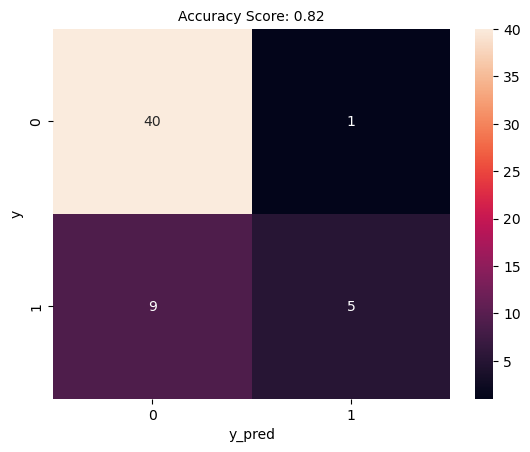

In [30]:
plot_confusion_matrix(y, y_pred)


In [31]:
y_prob = log_model.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.98      0.89        41
           1       0.83      0.36      0.50        14

    accuracy                           0.82        55
   macro avg       0.82      0.67      0.69        55
weighted avg       0.82      0.82      0.79        55



C:\Users\can\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


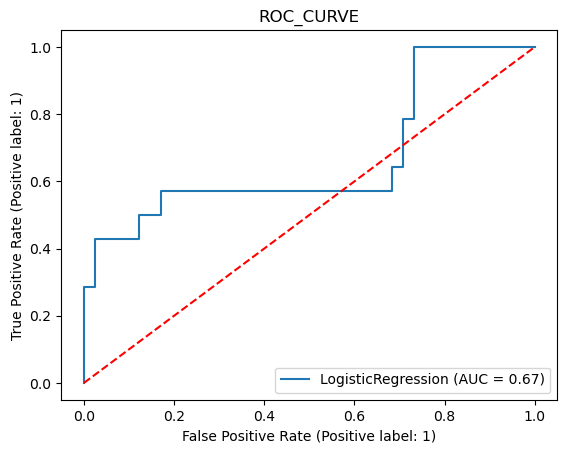

In [32]:
plot_roc_curve(log_model,X_test,y_test)
plt.title("ROC_CURVE")
plt.plot([0,1],[0,1],"r--")

In [33]:
cv_results = cross_validate(log_model,
                          X,
                          y,
                          cv=10,
                           scoring=["accuracy","precision","recall","f1","roc_auc"]
                         )
print("Log test accuracy" , cv_results["test_accuracy"].mean())
print("Log test precision" , cv_results["test_precision"].mean())
print("Log test recall" , cv_results["test_recall"].mean())
print("Log test f1" , cv_results["test_f1"].mean())
print("Log test roc_auc" , cv_results["test_roc_auc"].mean())
log_acc = cv_results["test_accuracy"].mean()

Log test accuracy 0.8525132275132276
Log test precision 0.7738095238095238
Log test recall 0.49000000000000005
Log test f1 0.5684648684648684
Log test roc_auc 0.8452886002886002


<br>

## CART MODEL

In [34]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=17)

In [35]:
cart_model = DecisionTreeClassifier(random_state=45).fit(X_train,y_train)

In [36]:
y_pred = cart_model.predict(X_test)


In [37]:
y_prob = cart_model.predict_proba(X_test)[:,1]

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        41
           1       0.55      0.43      0.48        14

    accuracy                           0.76        55
   macro avg       0.68      0.65      0.66        55
weighted avg       0.75      0.76      0.75        55



In [39]:
roc_auc_score(y_test,y_prob)

0.6533101045296168

C:\Users\can\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


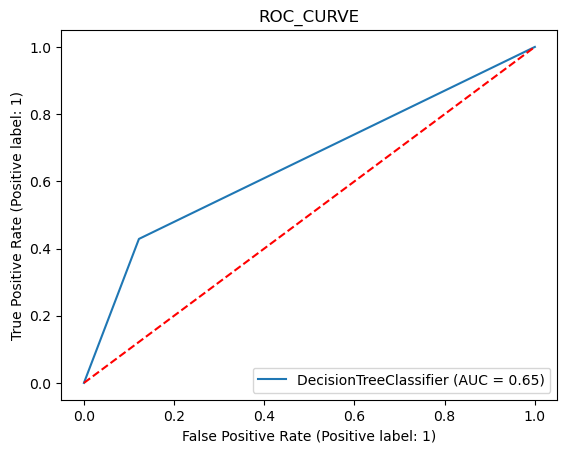

In [40]:
plot_roc_curve(cart_model,X_test,y_test)
plt.title("ROC_CURVE")
plt.plot([0,1],[0,1],"r--")

In [41]:
cv_results = cross_validate(cart_model,
                           X,
                           y,
                           cv=10,
                            scoring = ["accuracy","f1","roc_auc","recall"]
                           )
print("CART test accuracy" , cv_results["test_accuracy"].mean())
print("CART test recall" , cv_results["test_recall"].mean())
print("CART test f1" , cv_results["test_f1"].mean())
print("CART test roc_auc" , cv_results["test_roc_auc"].mean())


CART test accuracy 0.819047619047619
CART test recall 0.6066666666666667
CART test f1 0.5721445221445223
CART test roc_auc 0.7406709956709957


### HİPERPARAMETRE OPTİMİZASYONU

In [42]:
cart_params = {"max_depth":range(1,11),
              "min_samples_split":range(2,20)}


In [43]:
cart_best_grid = GridSearchCV(cart_model,
                             cart_params,
                             cv=10,
                             n_jobs = -1,
                             verbose = 1).fit(X_train,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [44]:
cart_best_grid.best_score_

0.8937229437229437

In [45]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_,random_state=45).fit(X_train,y_train)

In [46]:
cv_results = cross_validate(cart_final,
                           X,
                           y,
                           cv=10,
                            scoring = ["accuracy","f1","roc_auc","recall"]
                           )
print("CART test accuracy" , cv_results["test_accuracy"].mean())
print("CART test recall" , cv_results["test_recall"].mean())
print("CART test f1" , cv_results["test_f1"].mean())
print("CART test roc_auc" , cv_results["test_roc_auc"].mean())
cart_acc = cv_results["test_accuracy"].mean()

CART test accuracy 0.878042328042328
CART test recall 0.47000000000000003
CART test f1 0.5756709956709957
CART test roc_auc 0.7280735930735931


In [47]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')



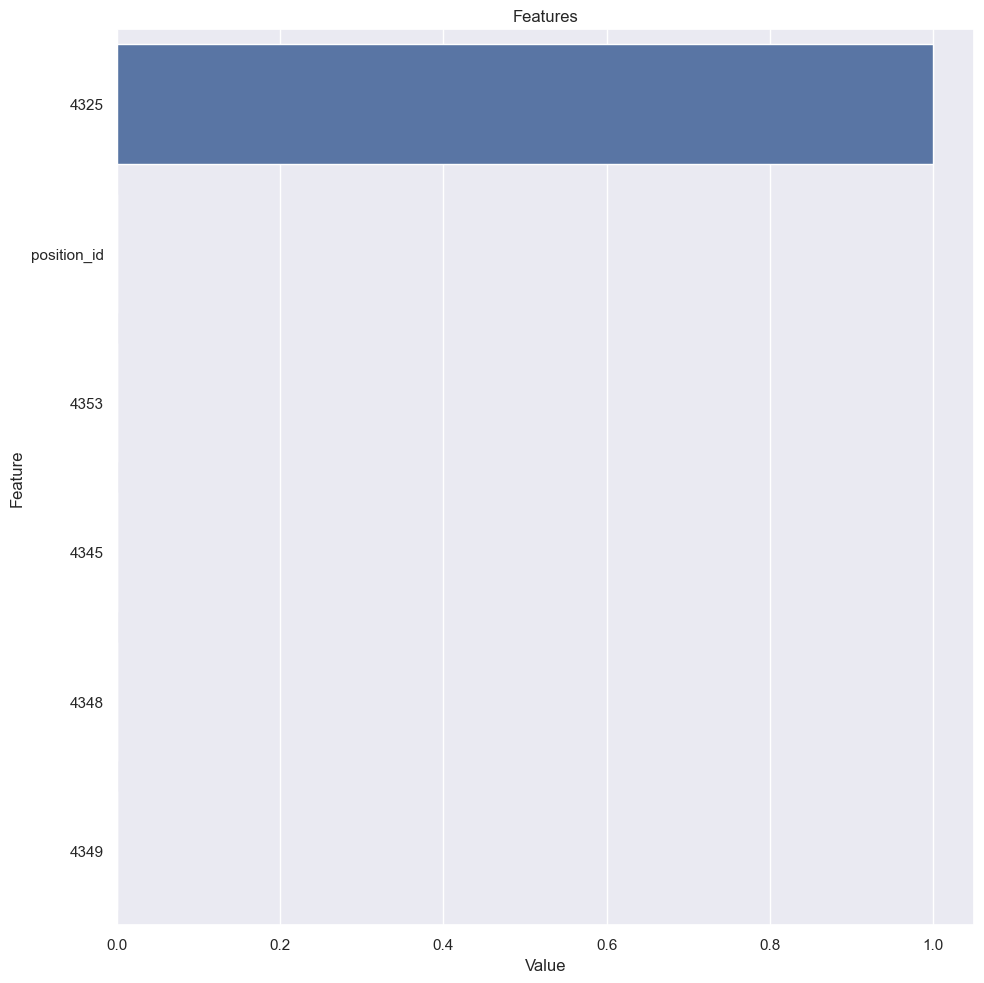

In [48]:
plot_importance(cart_final, X, num=6)

In [49]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

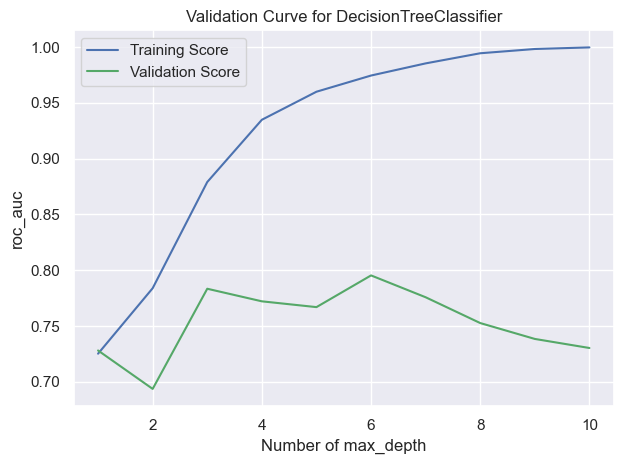

In [50]:
val_curve_params(cart_final, X, y, "max_depth", range(1, 11), scoring = "roc_auc")

<br>

# RF MODEL

In [51]:
rf_model = RandomForestClassifier(random_state=45)

In [52]:
cv_results = cross_validate(rf_model,
                           X,
                           y,
                           cv=10,
                            scoring = ["accuracy","f1","roc_auc","recall"]
                           )
print("RF test accuracy" , cv_results["test_accuracy"].mean())
print("RF test recall" , cv_results["test_recall"].mean())
print("RF test f1" , cv_results["test_f1"].mean())
print("RF test roc_auc" , cv_results["test_roc_auc"].mean())


RF test accuracy 0.8892857142857145
RF test recall 0.4933333333333333
RF test f1 0.6230519480519481
RF test roc_auc 0.9068903318903319


In [53]:
rf_params = {
    "max_depth":[3,4,6,8],
    "max_features":[3,5,7,9],
    "min_samples_split":[2,5,8,10,12],
    "n_estimators":[200,500,800]
}

In [54]:
rf_best_grid = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=True).fit(X,y)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


In [55]:
rf_best_grid.best_params_

{'max_depth': 8,
 'max_features': 3,
 'min_samples_split': 10,
 'n_estimators': 800}

In [56]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_,random_state=45).fit(X,y)

In [57]:
cv_results = cross_validate(rf_final,
                            X,
                            y,
                            cv=10,
                            scoring=["accuracy","f1","roc_auc","recall"])
print("RF test accuracy" , cv_results["test_accuracy"].mean())
print("RF test recall" , cv_results["test_recall"].mean())
print("RF test f1" , cv_results["test_f1"].mean())
print("RF test roc_auc" , cv_results["test_roc_auc"].mean())
rf_acc = cv_results["test_accuracy"].mean()

RF test accuracy 0.8854497354497355
RF test recall 0.4533333333333333
RF test f1 0.5847979797979799
RF test roc_auc 0.8968542568542569


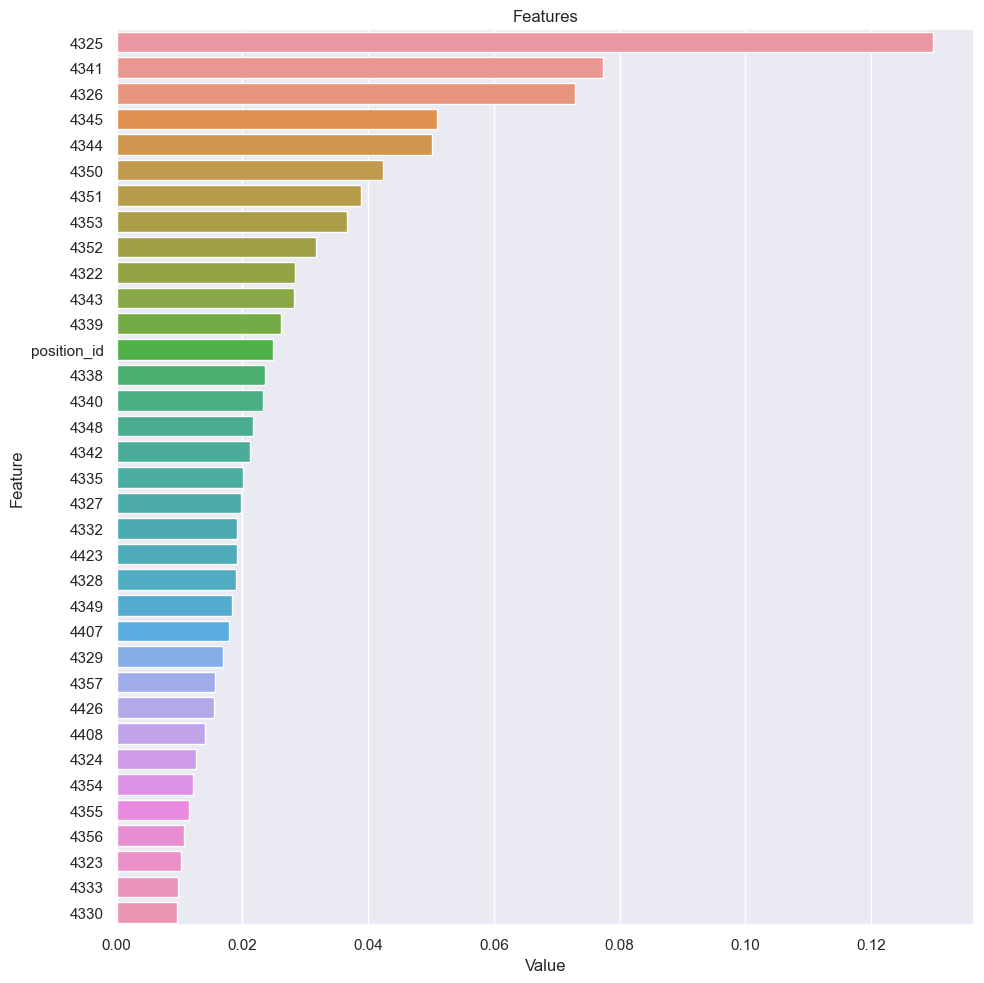

In [58]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_final, X)

In [59]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

In [60]:
rf_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 45,
 'verbose': 0,
 'warm_start': False}

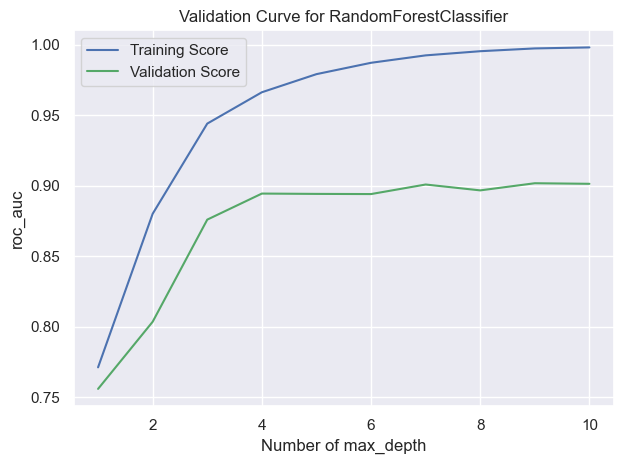

In [61]:
val_curve_params(rf_final, X, y, "max_depth", range(1, 11), scoring="roc_auc")

<br>

## GBM

In [62]:
gbm_model = GradientBoostingClassifier(random_state=45)

In [63]:
cv_results = cross_validate(gbm_model,
                            X,
                            y,
                            cv=10,
                            scoring=["accuracy","f1","roc_auc","recall"])
print("GBM test accuracy" , cv_results["test_accuracy"].mean())
print("GBM test recall" , cv_results["test_recall"].mean())
print("GBM test f1" , cv_results["test_f1"].mean())
print("GBM test roc_auc" , cv_results["test_roc_auc"].mean())


GBM test accuracy 0.8560846560846562
GBM test recall 0.49000000000000005
GBM test f1 0.5720923520923521
GBM test roc_auc 0.8697691197691197


In [64]:
gbm_params = {"learning_rate":[0.001,0.01,0.05],
             "max_depth":[3,6,8,10],
             "n_estimators":[200,500,1000,2000],
             "subsample":[1,0.5,0.8]}

In [65]:
gbm_best_grid = GridSearchCV(gbm_model,
                             gbm_params,cv=10,
                             n_jobs = -1,
                             verbose=True
                            ).fit(X,y)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [66]:
gbm_best_grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}

In [67]:
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_,random_state=45).fit(X,y)

In [68]:
cv_results = cross_validate(gbm_final,
                            X,
                            y,
                            cv=10,
                            scoring=["accuracy","f1","roc_auc","recall"])
print("GBM test accuracy" , cv_results["test_accuracy"].mean())
print("GBM test recall" , cv_results["test_recall"].mean())
print("GBM test f1" , cv_results["test_f1"].mean())
print("GBM test roc_auc" , cv_results["test_roc_auc"].mean())
gbm_acc = cv_results["test_accuracy"].mean()

GBM test accuracy 0.8857142857142858
GBM test recall 0.6266666666666667
GBM test f1 0.6856926406926406
GBM test roc_auc 0.8968975468975469


In [69]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

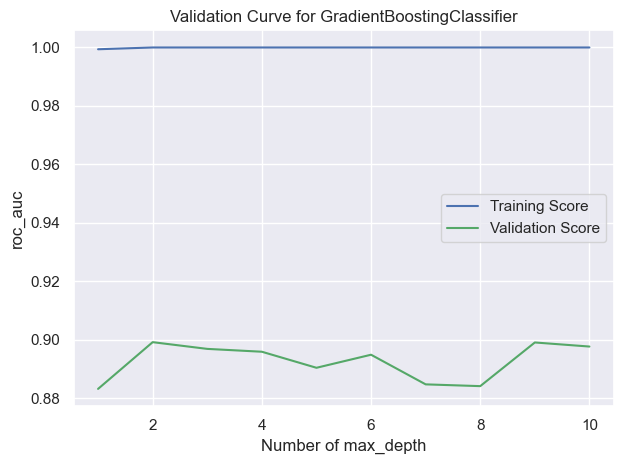

In [70]:
val_curve_params(gbm_final, X, y, "max_depth", range(1, 11), scoring="roc_auc")

<br>

In [71]:
num_cols = [col for col in atvalue_pivot.columns if col not in ['player_id', 'position_id', 'potential_label']]

X = atvalue_pivot[num_cols]
y = atvalue_pivot["potential_label"]

## LGBM

In [72]:
lgbm_model = LGBMClassifier(random_state=45)


In [73]:
cv_results = cross_validate(lgbm_model,
                            X,
                            y,
                            cv=10,
                            scoring=["accuracy","f1","roc_auc","recall"])
print("LGBM test accuracy" , cv_results["test_accuracy"].mean())
print("LGBM test recall" , cv_results["test_recall"].mean())
print("LGBM test f1" , cv_results["test_f1"].mean())
print("LGBM test roc_auc" , cv_results["test_roc_auc"].mean())


LGBM test accuracy 0.8855820105820106
LGBM test recall 0.5766666666666665
LGBM test f1 0.6604800754800755
LGBM test roc_auc 0.889018759018759


In [74]:
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

In [75]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [76]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=45).fit(X, y)


In [77]:
cv_results = cross_validate(lgbm_final,
                            X,
                            y,
                            cv=10,
                            scoring=["accuracy","f1","roc_auc","recall"])
print("LGBM test accuracy" , cv_results["test_accuracy"].mean())
print("LGBM test recall" , cv_results["test_recall"].mean())
print("LGBM test f1" , cv_results["test_f1"].mean())
print("LGBM test roc_auc" , cv_results["test_roc_auc"].mean())
lgbm_acc = cv_results["test_accuracy"].mean()

LGBM test accuracy 0.8746031746031747
LGBM test recall 0.5233333333333332
LGBM test f1 0.6130519480519481
LGBM test roc_auc 0.8816305916305917


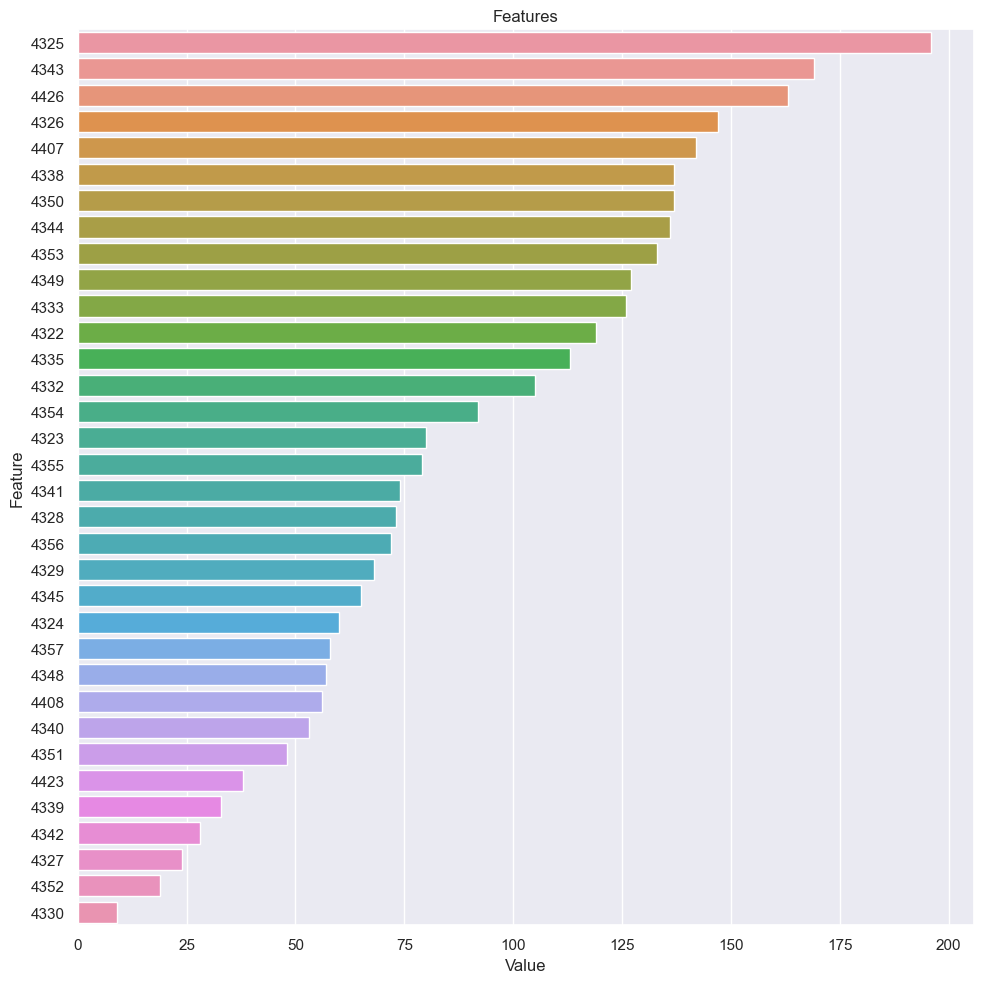

In [78]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(lgbm_final, X)

In [79]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)


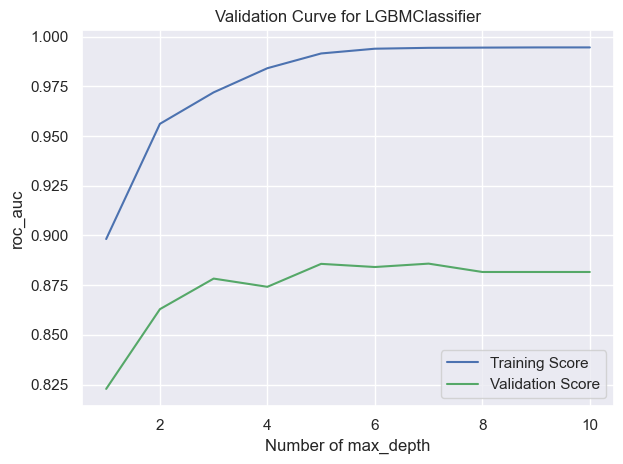

In [80]:
val_curve_params(lgbm_final, X, y, "max_depth", range(1, 11), scoring="roc_auc")

<br>

## XGBoost

In [81]:
xgboost_model = XGBClassifier(random_state=45)

In [82]:
cv_results = cross_validate(xgboost_model,
                            X,
                            y,
                            cv=10,
                            scoring=["accuracy","f1","roc_auc","recall"])
print("XGBoost test accuracy" , cv_results["test_accuracy"].mean())
print("XGBoost test recall" , cv_results["test_recall"].mean())
print("XGBoost test f1" , cv_results["test_f1"].mean())
print("XGBoost test roc_auc" , cv_results["test_roc_auc"].mean())


XGBoost test accuracy 0.8671957671957673
XGBoost test recall 0.61
XGBoost test f1 0.6446553446553447
XGBoost test roc_auc 0.877099567099567


In [83]:
xgboost_params = {"learning_rate":[0.1,0.01,0.001],
                 "max_depth":[5,8,12,15,20],
                 "n_estimators":[100,500,1000],
                  "colsample_bytree":[0.5,0.7,1]
                  }


In [84]:
xgboost_best_grid = GridSearchCV(xgboost_model,
                                 xgboost_params,
                                 cv=5,n_jobs=-1,
                                 verbose = True).fit(X,y)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


In [85]:
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_,
                                         random_state=17).fit(X,y)

In [86]:
cv_results = cross_validate(xgboost_final,
                            X,
                            y,
                            cv=10,
                            scoring=["accuracy","f1","roc_auc","recall"])
print("XGBoost test accuracy" , cv_results["test_accuracy"].mean())
print("XGBoost test recall" , cv_results["test_recall"].mean())
print("XGBoost test f1" , cv_results["test_f1"].mean())
print("XGBoost test roc_auc" , cv_results["test_roc_auc"].mean())
xgboost_acc = cv_results["test_accuracy"].mean()

XGBoost test accuracy 0.8784391534391535
XGBoost test recall 0.5599999999999999
XGBoost test f1 0.6435608835608835
XGBoost test roc_auc 0.8887301587301588


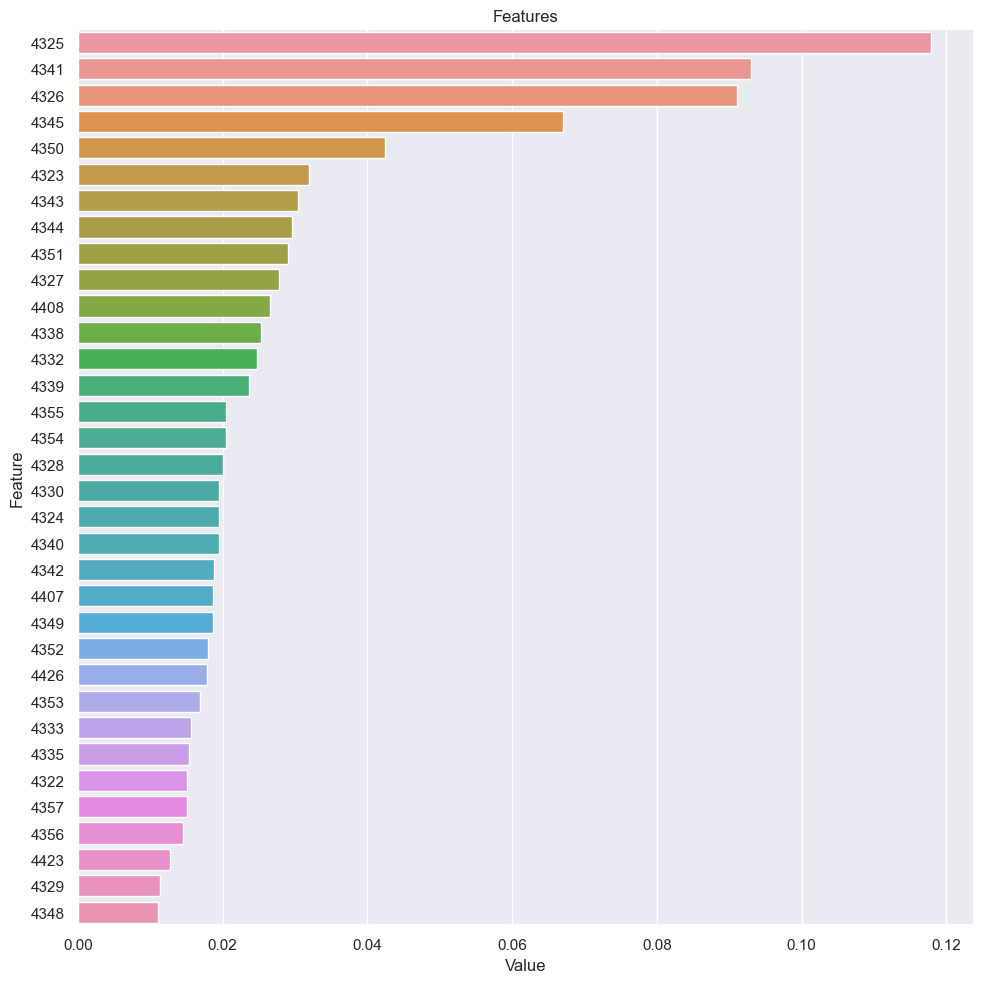

In [87]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(xgboost_final, X)

In [88]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)


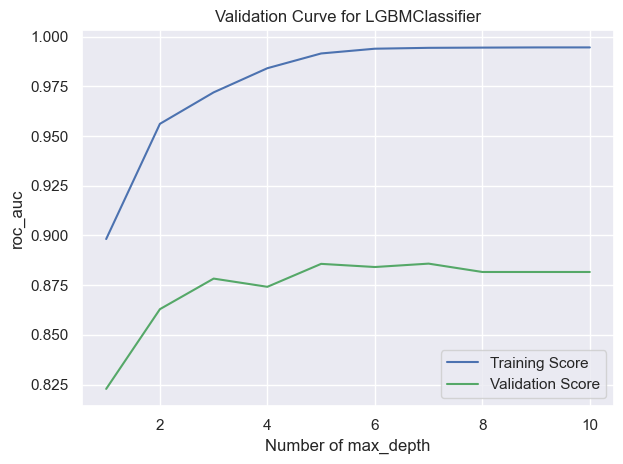

In [89]:
val_curve_params(lgbm_final, X, y, "max_depth", range(1, 11), scoring="roc_auc")

In [90]:
print("XGBoost accuracy " , xgboost_acc)
print("LGBM accuracy " , lgbm_acc)
print("GBM accuracy " , gbm_acc)
print("RF accuracy " , rf_acc)
print("CART accuracy " , cart_acc)
print("LOG accuracy " , log_acc)



XGBoost accuracy  0.8784391534391535
LGBM accuracy  0.8746031746031747
GBM accuracy  0.8857142857142858
RF accuracy  0.8854497354497355
CART accuracy  0.878042328042328
LOG accuracy  0.8525132275132276


## GBM en iyi başarı değeri olan modeldir.